<a href="https://colab.research.google.com/github/arushi153/CodSoft/blob/main/breast_cancer_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
from google.colab import files

uploaded = files.upload()  # A file select dialog will open


Saving data (1).csv to data (1) (1).csv


In [19]:
print(uploaded.keys())


dict_keys(['data (1) (1).csv'])


In [20]:
import pandas as pd
import io

data = pd.read_csv(io.BytesIO(uploaded['data (1) (1).csv']))
print(data.head())


         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_wor

In [21]:
data = data.drop('id', axis=1)
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

svc = SVC(random_state=42)
svc.fit(X_train_scaled, y_train)

xgb = XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42)
xgb.fit(X_train, y_train)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [23:04:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [24]:
from sklearn.metrics import accuracy_score, classification_report

# Predictions
rf_pred = rf.predict(X_test)
svc_pred = svc.predict(X_test_scaled)
xgb_pred = xgb.predict(X_test)

print('Random Forest Accuracy:', accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

print('SVC Accuracy:', accuracy_score(y_test, svc_pred))
print(classification_report(y_test, svc_pred))

print('XGBoost Accuracy:', accuracy_score(y_test, xgb_pred))
print(classification_report(y_test, xgb_pred))


Random Forest Accuracy: 0.9736842105263158
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114

SVC Accuracy: 0.9736842105263158
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114

XGBoost Accuracy: 0.9736842105263158
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg   

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
import io

# Load data from uploaded file (adjust name if different)
data = pd.read_csv(io.BytesIO(uploaded['data (1) (1).csv']))

# Preprocess data
data = data.drop('id', axis=1)
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42)

# Scale features for SVC
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train models
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

svc = SVC(random_state=42)
svc.fit(X_train_scaled, y_train)

xgb = XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42)
xgb.fit(X_train, y_train)

# Predict on test data
rf_pred = rf.predict(X_test)
svc_pred = svc.predict(X_test_scaled)
xgb_pred = xgb.predict(X_test)

# Evaluate models
print('Random Forest Accuracy:', accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

print('SVC Accuracy:', accuracy_score(y_test, svc_pred))
print(classification_report(y_test, svc_pred))

print('XGBoost Accuracy:', accuracy_score(y_test, xgb_pred))
print(classification_report(y_test, xgb_pred))


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [23:07:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Random Forest Accuracy: 0.9736842105263158
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114

SVC Accuracy: 0.9736842105263158
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114

XGBoost Accuracy: 0.9736842105263158
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg   

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
import io

# Load data from uploaded file (adjust name if different)
data = pd.read_csv(io.BytesIO(uploaded['data (1) (1).csv']))

# Preprocess data
data = data.drop('id', axis=1)
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42)

# Scale features for SVC
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train models
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

svc = SVC(random_state=42)
svc.fit(X_train_scaled, y_train)

xgb = XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42)
xgb.fit(X_train, y_train)

# Predict on test data
rf_pred = rf.predict(X_test)
svc_pred = svc.predict(X_test_scaled)
xgb_pred = xgb.predict(X_test)

# Evaluate models
print('Random Forest Accuracy:', accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

print('SVC Accuracy:', accuracy_score(y_test, svc_pred))
print(classification_report(y_test, svc_pred))

print('XGBoost Accuracy:', accuracy_score(y_test, xgb_pred))
print(classification_report(y_test, xgb_pred))


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [23:08:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Random Forest Accuracy: 0.9736842105263158
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114

SVC Accuracy: 0.9736842105263158
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114

XGBoost Accuracy: 0.9736842105263158
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg   

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns


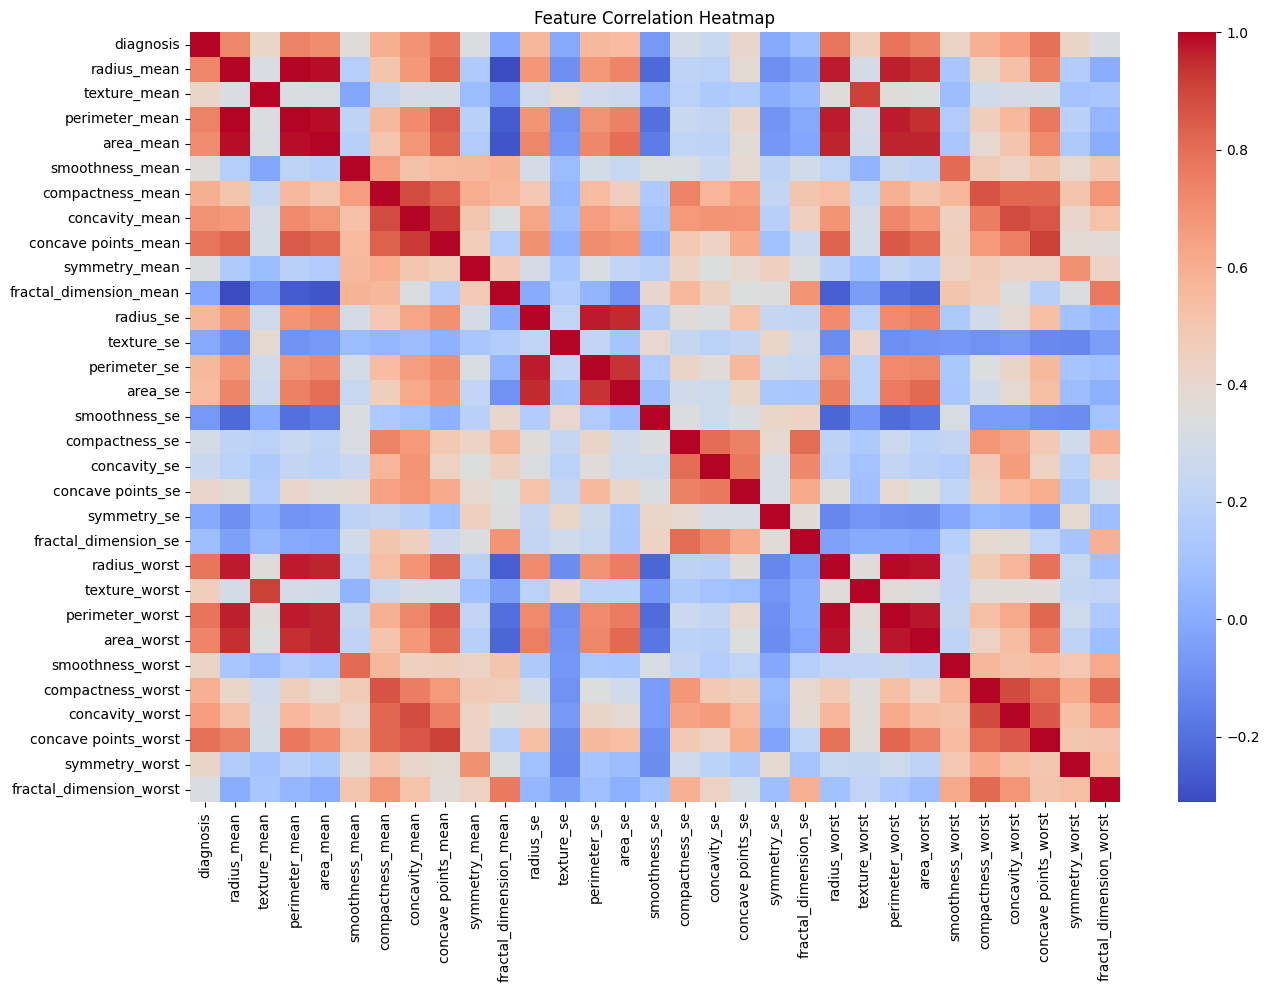

In [28]:
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), annot=False, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


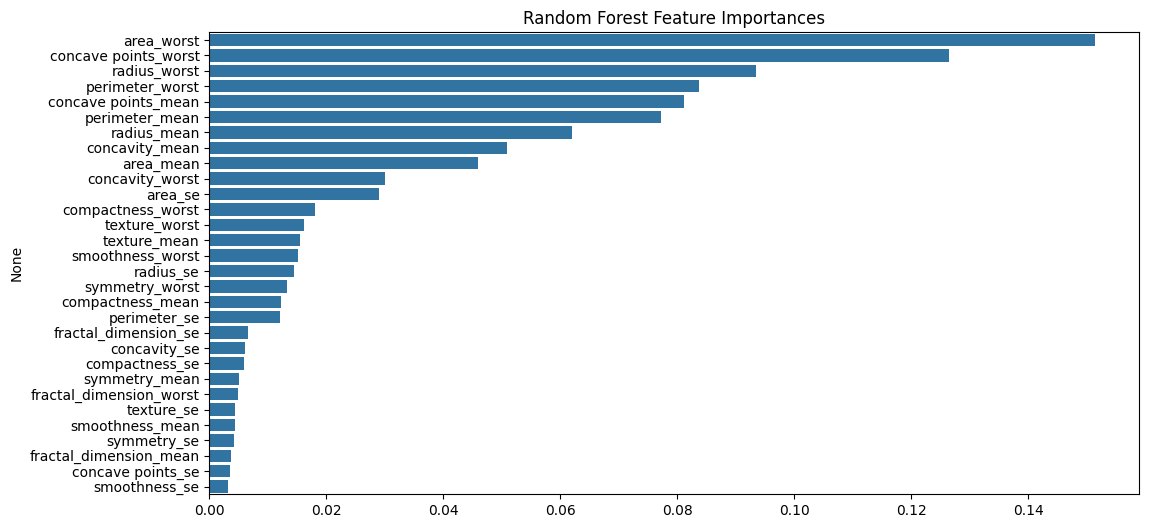

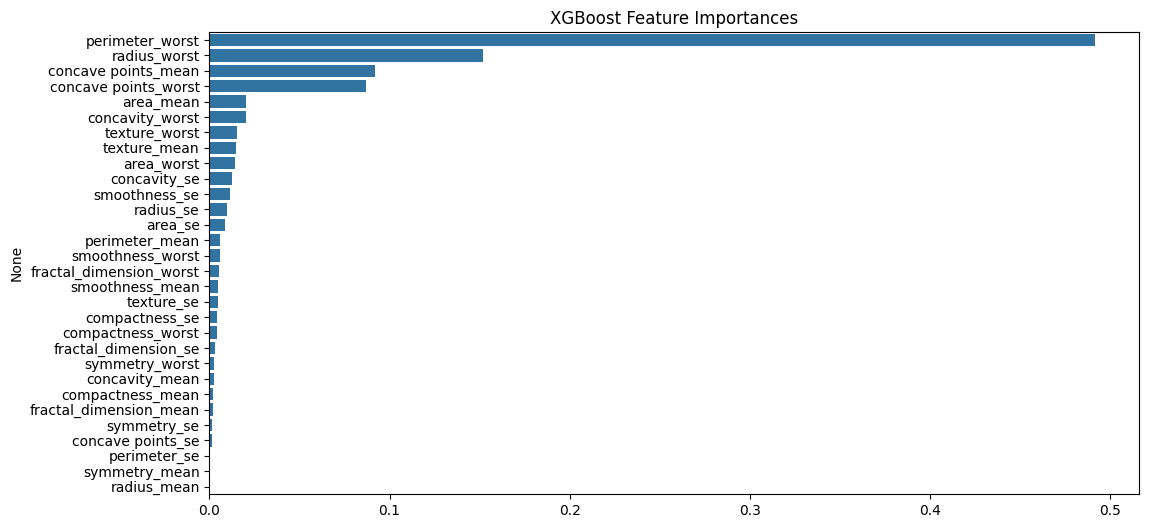

In [29]:
def plot_feature_importance(model, X, title):
    importances = model.feature_importances_
    indices = importances.argsort()[::-1]
    plt.figure(figsize=(12, 6))
    sns.barplot(x=importances[indices], y=X.columns[indices])
    plt.title(title)
    plt.show()

plot_feature_importance(rf, X, "Random Forest Feature Importances")
plot_feature_importance(xgb, X, "XGBoost Feature Importances")


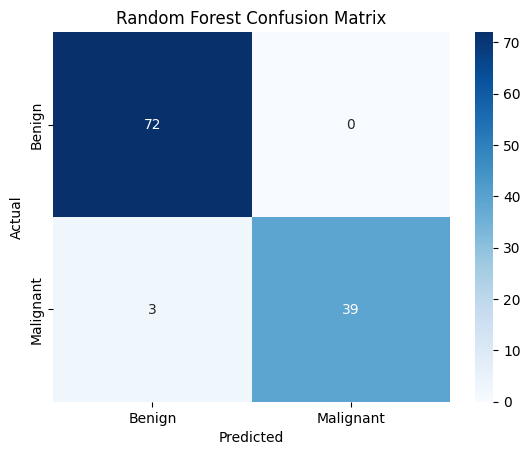

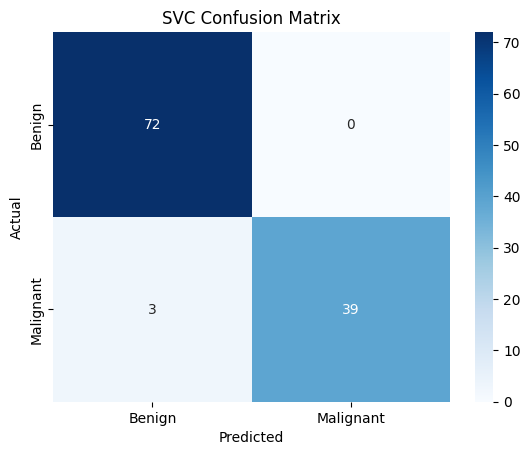

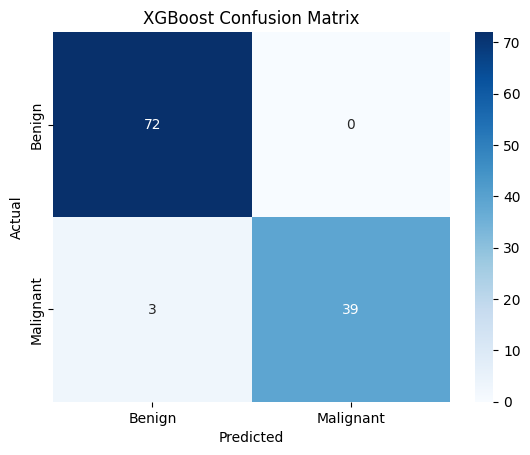

In [30]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

plot_confusion_matrix(y_test, rf_pred, 'Random Forest Confusion Matrix')
plot_confusion_matrix(y_test, svc_pred, 'SVC Confusion Matrix')
plot_confusion_matrix(y_test, xgb_pred, 'XGBoost Confusion Matrix')
